You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('height_weight.csv')
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [45]:
df.shape

(10000, 3)

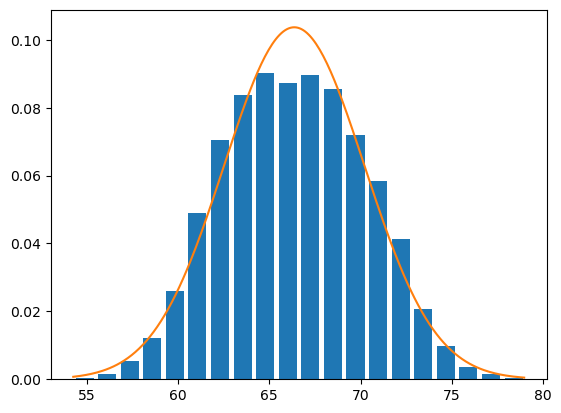

In [14]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins=20, rwidth=0.8, density=True)
rng = np.arange(df.height.min(), df.height.max(), 0.1) # creating an array to pass as parameters for 'X'
# Here then we will create a plot for X - Mu / Sigma form 
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

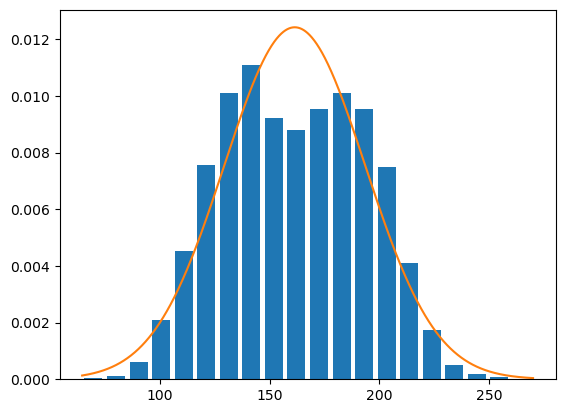

In [26]:
from scipy.stats import norm
import numpy as np
plt.hist(df.weight, bins=20, rwidth=0.8,density=True)

rng = np.arange(df.weight.min(),df.weight.max(),0.1)
plt.plot(rng, norm.pdf(rng, df.weight.mean(),df.weight.std()))

Detecting the outliers for Height:

In [29]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [31]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [39]:
df_outliers_based_on_height = df[(df.height<lower_limit) | (df.height>upper_limit)]
df_outliers_based_on_height

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [43]:
df_outliers_based_on_height.shape

(8, 3)

Detecting Outliers for Weight:

In [48]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)

IQR = Q3 - Q1
IQR

51.35147356318197

In [50]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit



(58.79084096072856, 264.19673521345646)

In [52]:
df_outliers_based_on_weight = df[(df.weight<lower_limit)|(df.weight>upper_limit)]
df_outliers_based_on_weight

,gender,height,weight
2014,Male,78.998742,269.989699


In [54]:
df_outliers_based_on_weight.shape

(1, 3)